In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5324.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3382.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1398.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1142.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5002.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2646.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_3476.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_1613.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_5593.BMP
/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group/AB-/cluster_5_2975.BMP
/kaggle/input/finger-print-based-blood-g

Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.
Class Weights: {0: 1.3282632743362832, 1: 0.7430383663366337, 2: 1.058862433862434, 3: 0.9858374384236454, 4: 1.1501436781609196, 5: 1.0124367622259696, 6: 0.8803152492668622, 7: 1.0532894736842104}
Class Names: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 254ms/step - accuracy: 0.1442 - loss: 3.6413 - val_accuracy: 0.1149 - val_loss: 5.0739
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.0625 - loss: 2.1023 - val_accuracy: 0.0000e+00 - val_loss: 5.4773
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 250ms/step - accuracy: 0.1559 - loss: 2.0486 - val_accuracy: 0.1106 - val_loss: 2.3669
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.1562 - loss: 1.9619 - val_accuracy: 0.0769 - val_loss: 1.9589
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 38s 252ms/step - accuracy: 0.1576 - loss: 2.0157 - val_accuracy: 0.2416 - val_loss: 1.9561
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.1250 - loss: 1.9535 - val_accuracy: 0.2308 - val_loss: 1.9926
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.1589 - loss: 2.0448 - val_accuracy: 0.1791 - val_loss: 1.9720
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.1250 - loss: 1

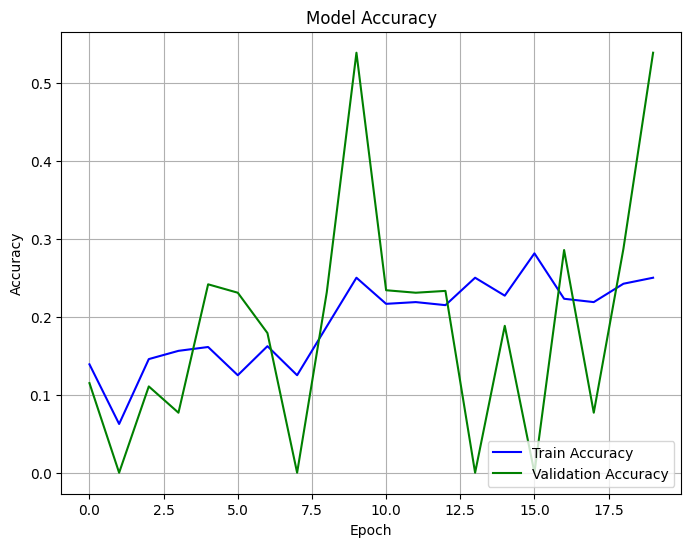

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.1999 - loss: 1.8724
Final Validation Loss: 1.7483
Final Validation Accuracy: 0.2807
Model saved successfully!


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/kaggle/input/finger-print-based-blood-group-dataset/dataset_blood_group'
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
EPOCHS = 20

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

labels = train_generator.classes
class_names = list(train_generator.class_indices.keys())
counts = np.bincount(labels)

total = np.sum(counts)
class_weights = {i: total / (len(counts) * count) for i, count in enumerate(counts)}

print("Class Weights:", class_weights)
print("Class Names:", class_names)

def create_better_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_better_model()

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    class_weight=class_weights
)

def plot_accuracy(history):
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_accuracy(history)

loss, acc = model.evaluate(validation_generator)
print(f"Final Validation Loss: {loss:.4f}")
print(f"Final Validation Accuracy: {acc:.4f}")

model.save('fingerprint_blood_group_model_final.h5')
print("Model saved successfully!")
